# **Weather Control Model**

**Imports**

In [30]:
import random
import numpy as np
random_seed = 70001
random.seed(random_seed)
np.random.seed(random_seed)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics, svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler 

**Load Dataset**

In [31]:
df = pd.read_csv("digitraffic_weather_balanced_ver1_2025.csv")

**Checking for Duplicates and Missing Values**

In [32]:
df.duplicated().sum()

36

In [33]:
df = df.drop_duplicates()

In [34]:
df['condition'].value_counts()

Rain      595
Normal    570
Snow      511
Ice       415
Name: condition, dtype: int64

In [35]:
df.isna().sum()

dew_point           0
avg_wind            0
humidity            0
rain                0
rain_sum            0
snow_depth          0
rain_amount         0
snow_amount         0
ice_measure         0
friction            0
ice_frequency       0
mean_temperature    0
condition           0
dtype: int64

**Mapping Targets**

In [36]:
# map the target variable and save the names into a list
mapping = {"Ice": 0, "Normal": 1, "Rain": 2, "Snow": 3}
df['condition'] = df['condition'].map(mapping)
labels = ["Ice", "Normal", "Rain", "Snow"]

**Train/Test Split**

In [37]:
X = df.drop("condition", axis=1)

y = df['condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

**Weather Model**

In [38]:
model = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=205, max_depth=26))
model.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=26, n_estimators=205))])

**Metrics**

In [39]:
# time measurement code from ChatGPT originally
import time

# Record the start time
start_time = time.time()

# Perform the prediction
predictions = model.predict(X_test)

# Record the end time
end_time = time.time()

# Calculate the total time taken
total_time = end_time - start_time

# Print the total time
print(f"Total time for predictions: {total_time:.4f} seconds")

Total time for predictions: 0.0110 seconds


In [40]:
# get the test predictions for metrics as usual
predictions = model.predict(X_test)

In [41]:
# print the classification report based on true values and predictions
print(classification_report(y_test, predictions, target_names=labels))

# get overall accuracy of the model and print it
acc = accuracy_score(y_test, predictions)
print("\nModel overall accuracy: {:.2f}%".format(acc * 100))

              precision    recall  f1-score   support

         Ice       0.99      0.98      0.99       114
      Normal       0.94      0.94      0.94       146
        Rain       0.90      0.92      0.91       129
        Snow       0.96      0.95      0.95       134

    accuracy                           0.95       523
   macro avg       0.95      0.95      0.95       523
weighted avg       0.95      0.95      0.95       523


Model overall accuracy: 94.65%


**Confusion Matrix**

[[112   1   0   1]
 [  0 137   6   3]
 [  1   8 119   1]
 [  0   0   7 127]]


<Axes: >

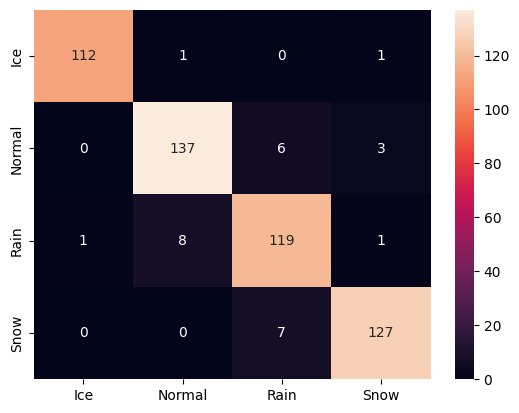

In [42]:
print(confusion_matrix(y_test, predictions))
sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', xticklabels=labels, yticklabels=labels)

**Exporting the model**

In [43]:
from joblib import dump
dump(model, "../weathercontrolmodel.joblib")

['../weathercontrolmodel.joblib']